# Results for local code

## 0. Load libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as st
import pickle
import seaborn as sns   

#%matplotlib inline

## 1. Initialize variables

In [22]:
recalculate_if_saved = False
repetitions = 14
number_of_updates = 150
algorithm_list = ['corrective', 'standard', 'preventive']
types_list = ['concurrent']
delay_list = ['1', '10', '100', '1000', '10000']
repetition_probability_list = ['0']
negation_probability_list = ['0', '5', '10', '20', '40', '80']
file_path = 'local/test/results_experiment_'
new_columns_metrics = ['inconsistencies', 
                       'messages_sent', 
                       'latency_per_operation', 
                       'overhead_data_structure', 
                       'overhead_per_message', 
                       'number_of_reconfigurations', 
                       'total_reconfiguration_time',
                       'result_algorithm',
                       'type',
                       'negation_probability',
                       'delay',
                       'repetition_probability',
                       'update']
file_path_images = '/images/seaborn/'
type_exp = 'concurrent'
current_directory = os.getcwd()
all_results = pd.DataFrame(columns=new_columns_metrics)

In [23]:
def save_all_dataframes_as_pickle(all_results):
    print('Saving....')
    current_directory = os.getcwd()
    path_results = '/saved_dataframes/'
    string_name = 'data_frame_'
    pickle.dump(all_results, open(current_directory + path_results + '/single_value/dataframe_data_all.p' , 'wb'))
    print('Saved!')

In [24]:
def calculate_values(all_results):    
    new_number = number_of_updates
    one_time_print = False
    for repetition_index in range(0, repetitions + 1):
        file_path = 'local/test/results_experiment_' + str(new_number)
        data = dict()
        data['update'] = number_of_updates * (repetition_index + 1)
        for delay in delay_list:
            data['delay'] = delay
            for repetition_probability in repetition_probability_list:
                data['repetition'] = repetition_probability
                for negation_probability in negation_probability_list:
                    data['negation'] = negation_probability
                    for algorithm in algorithm_list:
                        data['algorithm'] = algorithm
                        for alg_type in types_list:  
                            data['alg_type'] = alg_type
                            str_1 = 'result_algorithm_*' + algorithm + '*_type_*' + alg_type + '*_negationProbability_*' + str(negation_probability)
                            str_2 = '*_delay_*' + str(delay) + '.0*_repetitionProbability_*' + str(repetition_probability) + '*.csv'
                            file_name = str_1 + str_2
                            try:
                                result = pd.read_csv(file_path +'/' + file_name, encoding='utf-8', sep=r'\s*,\s*', header=0, engine='python')                                
                                result['result_algorithm'] = [algorithm]*len(result)
                                result['type'] = [alg_type]*len(result)
                                result['negation_probability'] = [str(negation_probability)]*len(result)
                                result['delay'] = [str(delay)]*len(result)
                                result['repetition_probability'] = [str(repetition_probability)]*len(result)
                                result['update'] = [str( data['update'])]*len(result)
                                
                                for index, row in result.iterrows():                                           
                                    all_results = all_results.append(row, ignore_index=True)                                      
                            except FileNotFoundError as e:
                                print(e)

        new_number += number_of_updates
    save_all_dataframes_as_pickle(all_results)
    return all_results

In [25]:
def load_values():
    print('Loading...')
    path_results = '/saved_dataframes/'
    current_directory = os.getcwd()
    loaded_data = pickle.load(open(current_directory + path_results + '/single_value/dataframe_data_all.p' , 'rb'))
    print('Loaded!')
    return loaded_data

In [26]:
if recalculate_if_saved:
    all_results = calculate_values(all_results)
else:
    all_results = load_values()
    
all_results

Loading...
Loaded!


,inconsistencies,messages_sent,latency_per_operation,overhead_data_structure,overhead_per_message,number_of_reconfigurations,total_reconfiguration_time,result_algorithm,type,negation_probability,delay,repetition_probability,update
0,0,296,0.013,82760.0,251400.0,0.0,0.007,corrective,concurrent,0,1,0,150
1,0,359,0.027,178248.0,307895.0,0.0,0.010,corrective,concurrent,0,1,0,150
2,0,334,0.035,250664.0,284110.0,0.0,0.010,corrective,concurrent,0,1,0,150
3,0,340,0.047,338296.0,290420.0,0.0,0.010,corrective,concurrent,0,1,0,150
4,0,333,0.061,415736.0,284525.0,0.0,0.011,corrective,concurrent,0,1,0,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31970,0,12388,2605.848,45080.0,19364221.0,0.0,0.121,preventive,concurrent,80,10000,0,1650
31971,0,12362,3603.153,45080.0,19328740.0,0.0,0.251,preventive,concurrent,80,10000,0,1650
31972,0,12496,3177.931,45080.0,19555473.0,0.0,0.113,preventive,concurrent,80,10000,0,1650
31973,0,12458,3534.850,45080.0,19513620.0,0.0,0.231,preventive,concurrent,80,10000,0,1650


## 2. Plot all metrics

### Plot overhead per message

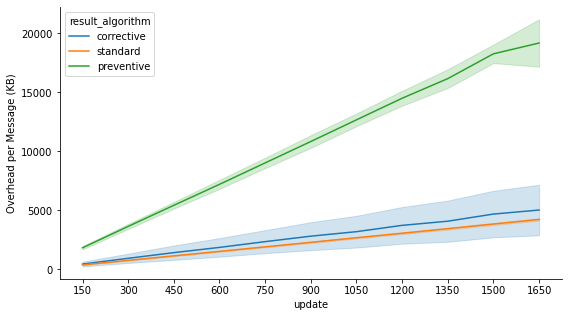

In [27]:
metric = 'overhead_per_message'
type_exp = 'concurrent'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)


# data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='80')] 
data_neg_30_del_10 =  all_results

data_neg_30_del_10['overhead_per_message'] = data_neg_30_del_10['overhead_per_message'].div(1000.0).round(3) 

fig, ax = plt.subplots(figsize=(9,5))
g = sns.lineplot(data=data_neg_30_del_10, x='update', y='overhead_per_message', ci='sd', hue='result_algorithm')
g.set(ylabel='Overhead per Message (KB)')
sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Plot messages sent

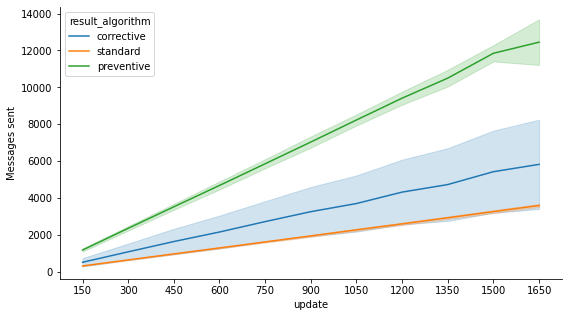

In [28]:
metric = 'messages_sent'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)


# data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
data_neg_30_del_10 =  all_results


fig, ax = plt.subplots(figsize=(9,5))
g = sns.lineplot(data=data_neg_30_del_10, x="update", y="messages_sent", ci='sd', hue="result_algorithm")
g.set(ylabel='Messages sent')
sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Plot Overhead Data Structure

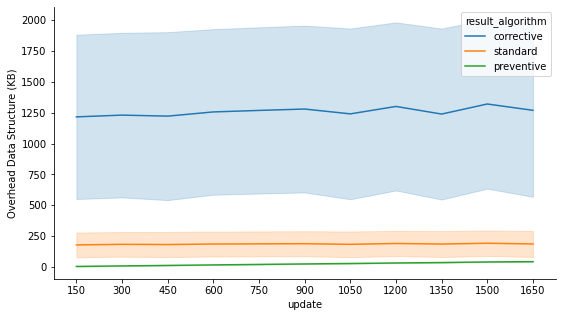

In [29]:
metric = 'overhead_data_structure'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

# data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
data_neg_30_del_10 =  all_results

data_neg_30_del_10[metric] = data_neg_30_del_10[metric].div(1000.0).round(3) 



fig, ax = plt.subplots(figsize=(9,5))
g = sns.lineplot(data=data_neg_30_del_10, x="update", y=metric, ci='sd', hue="result_algorithm")

g.set(ylabel='Overhead Data Structure (KB)')
sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Plot Latency per Operation

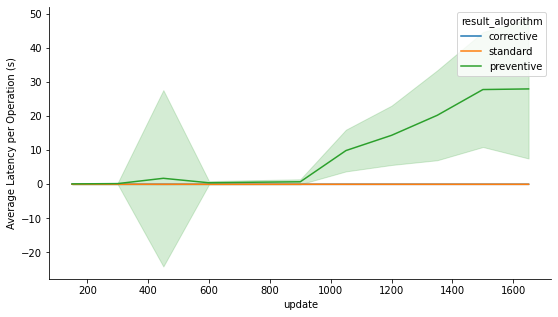

In [30]:
metric = 'latency_per_operation'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

# data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
data_neg_30_del_10 =  all_results

# display(data_neg_30_del_10.head(10))
#  mean_vector = mean_vector / (number_of_updates * (repetition_index + 1))  

data_neg_30_del_10['update'] = data_neg_30_del_10['update'].astype('float')

data_neg_30_del_10[metric] = data_neg_30_del_10[metric].div(data_neg_30_del_10['update'])

fig, ax = plt.subplots(figsize=(9,5))
g = sns.lineplot(data=data_neg_30_del_10, x="update", y=metric, ci='sd', hue="result_algorithm")
g.set(ylabel='Average Latency per Operation (s)')

sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Plot number of reconfigurations

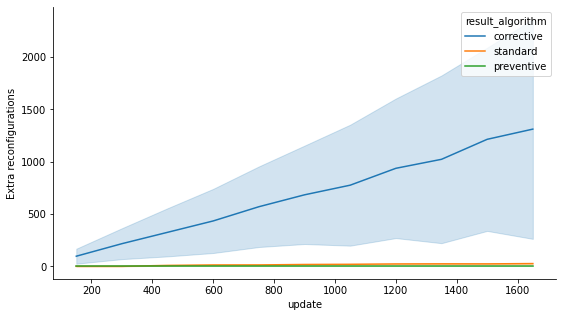

In [31]:
metric = 'number_of_reconfigurations'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

# data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
data_neg_30_del_10 =  all_results


fig, ax = plt.subplots(figsize=(9,5))
g = sns.lineplot(data=data_neg_30_del_10, x="update", y=metric, ci='sd', hue="result_algorithm")
g.set(ylabel='Extra reconfigurations')
sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Total reconfiguration time

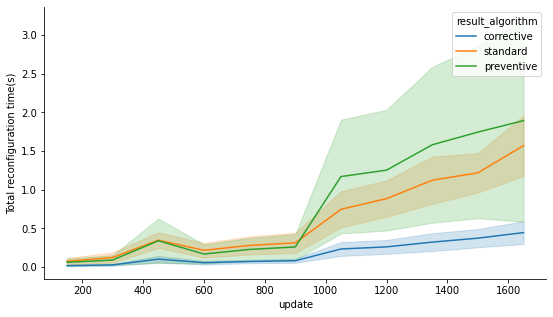

In [32]:
metric = 'total_reconfiguration_time'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

# data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
data_neg_30_del_10 =  all_results

fig, ax = plt.subplots(figsize=(9,5))
g = sns.lineplot(data=data_neg_30_del_10, x="update", y=metric, ci='sd', hue="result_algorithm")
g.set(ylabel='Total reconfiguration time(s)')
sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Plot inconsistencies

ValueError: Unable to parse string "" at position 19300

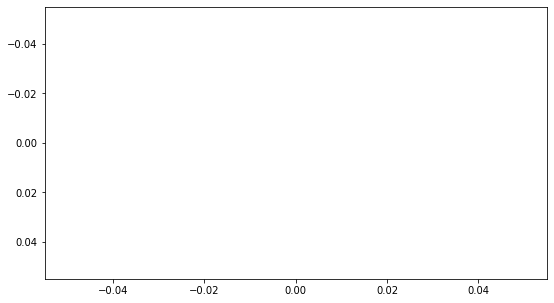

In [33]:
metric = 'inconsistencies'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

# data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
data_neg_30_del_10 =  all_results

fig, ax = plt.subplots(figsize=(9,5))
g = sns.lineplot(data=data_neg_30_del_10, x="update", y=metric, ci='sd', hue="result_algorithm")
g.set(ylabel='Inconsistencies')
sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)